In [63]:
import pandas as pd
df=pd.read_csv(r'C:\Users\XNovaQ12\Downloads\archive (6)\spam.csv',encoding='latin_1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['label']=a.fit_transform(df['v1'])

In [65]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [66]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
b=TfidfVectorizer(max_features=1000)
x=b.fit_transform(df['v2']).toarray()#X = vectorizer.fit_transform(df['v2']).toarray()
y=df['label']
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 1000))

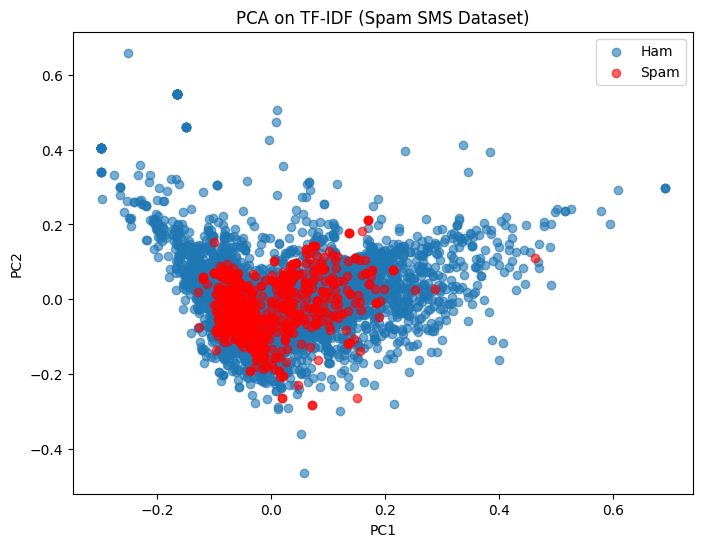

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[y==0,0], x_pca[y==0,1], label='Ham', alpha=0.6)
plt.scatter(x_pca[y==1,0], x_pca[y==1,1], label='Spam', alpha=0.6, color='red')
plt.title("PCA on TF-IDF (Spam SMS Dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

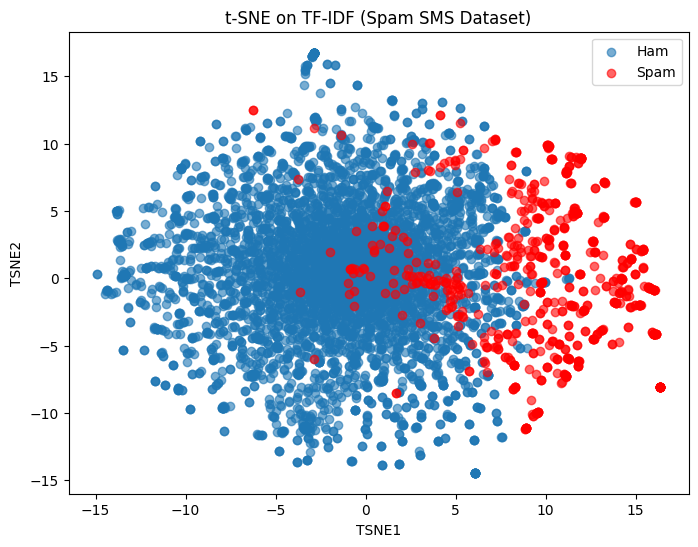

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8,6))
plt.scatter(x_tsne[y==0,0], x_tsne[y==0,1], label='Ham', alpha=0.6)
plt.scatter(x_tsne[y==1,0], x_tsne[y==1,1], label='Spam', alpha=0.6, color='red')
plt.title("t-SNE on TF-IDF (Spam SMS Dataset)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend()
plt.show()